In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# now read our data file
df = pd.read_csv('product_sales_dataset.csv')

In [3]:
# now we inspect the data
df.head(10)

,Order_ID,Order_Date,Customer_Name,City,State,Region,Country,Category,Sub_Category,Product_Name,Quantity,Unit_Price,Revenue,Profit
0,1,08-23-23,Bianca Brown,Jackson,Mississippi,South,United States,Accessories,Small Electronics,Phone Case,3,201.01,603.03,221.49
1,2,12-20-24,Jared Edwards,Grand Rapids,Michigan,Centre,United States,Accessories,Small Electronics,Charging Cable,4,74.30,297.20,97.09
2,3,01-29-24,Susan Valdez,Minneapolis,Minnesota,Centre,United States,Clothing & Apparel,Sportswear,Nike Air Force 1,1,68.19,68.19,25.47
3,4,11-29-24,Tina Williams,Tallahassee,Florida,South,United States,Clothing & Apparel,Sportswear,Adidas Tracksuit,3,209.64,628.92,231.38
4,5,09-21-23,Catherine Gordon,Baltimore,Maryland,East,United States,Accessories,Bags,Backpack,1,216.63,216.63,42.46
5,6,10-18-24,Brittany Johnson,Boston,Massachusetts,East,United States,Electronics,Home Appliances,Instant Pot,1,701.15,701.15,90.63
6,7,12-11-24,Katie Rodriguez MD,Seattle,Washington,West,United States,Electronics,Wearables,Apple Watch,2,875.34,1750.68,320.37
7,8,05-05-23,John Davis,Tulsa,Oklahoma,South,United States,Clothing & Apparel,Men's Wear,Levi's Jeans,1,329.29,329.29,65.91
8,9,10-25-23,Edward Hicks,Salt Lake City,Utah,West,United States,Clothing & Apparel,Footwear,Timberland Boots,2,115.35,230.70,87.44
9,10,10-15-23,Carrie Cunningham,Fort Smith,Arkansas,South,United States,Electronics,Smartphones,Apple iPhone 14,5,509.51,2547.55,472.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       200000 non-null  int64  
 1   Order_Date     200000 non-null  object 
 2   Customer_Name  200000 non-null  object 
 3   City           200000 non-null  object 
 4   State          200000 non-null  object 
 5   Region         200000 non-null  object 
 6   Country        200000 non-null  object 
 7   Category       200000 non-null  object 
 8   Sub_Category   200000 non-null  object 
 9   Product_Name   200000 non-null  object 
 10  Quantity       200000 non-null  int64  
 11   Unit_Price    200000 non-null  float64
 12   Revenue       200000 non-null  float64
 13   Profit        200000 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 21.4+ MB


In [5]:
# now we saw our data dimentions (rows and columns)
df.shape

(200000, 14)

In [6]:
# checking null values count in columns
df.isnull().sum()

Order_ID         0
Order_Date       0
Customer_Name    0
City             0
State            0
Region           0
Country          0
Category         0
Sub_Category     0
Product_Name     0
Quantity         0
 Unit_Price      0
 Revenue         0
 Profit          0
dtype: int64

In [7]:
# it checks tha data types of our columns
df.dtypes

Order_ID           int64
Order_Date        object
Customer_Name     object
City              object
State             object
Region            object
Country           object
Category          object
Sub_Category      object
Product_Name      object
Quantity           int64
 Unit_Price      float64
 Revenue         float64
 Profit          float64
dtype: object

In [8]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_Name', 'City', 'State', 'Region',
       'Country', 'Category', 'Sub_Category', 'Product_Name', 'Quantity',
       ' Unit_Price ', ' Revenue ', ' Profit '],
      dtype='object')

In [9]:
# it converts it into Datetime
df['Order_Date']=pd.to_datetime(df['Order_Date'])

/var/folders/9j/rr1t6sxj4xx6_1p59tjtwqf00000gn/T/ipykernel_1257/3124292559.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Date']=pd.to_datetime(df['Order_Date'])


In [10]:
# check is it convert or not
df.dtypes

Order_ID                  int64
Order_Date       datetime64[ns]
Customer_Name            object
City                     object
State                    object
Region                   object
Country                  object
Category                 object
Sub_Category             object
Product_Name             object
Quantity                  int64
 Unit_Price             float64
 Revenue                float64
 Profit                 float64
dtype: object

In [11]:
# now check duplicate values
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Length: 200000, dtype: bool

In [12]:
# now remove duplicates
df.drop_duplicates(inplace=True)

In [13]:
# create new columns
df['Month']=df['Order_Date'].dt.month

In [14]:
df['Year']=df['Order_Date'].dt.year

In [15]:
# remove spaces betwwen columns
df.columns=df.columns.str.strip()

In [16]:
# now perform some operations and get some information
df['Profit'].sum()

np.float64(31548608.13)

In [17]:
df

,Order_ID,Order_Date,Customer_Name,City,State,Region,Country,Category,Sub_Category,Product_Name,Quantity,Unit_Price,Revenue,Profit,Month,Year
0,1,2023-08-23,Bianca Brown,Jackson,Mississippi,South,United States,Accessories,Small Electronics,Phone Case,3,201.01,603.03,221.49,8,2023
1,2,2024-12-20,Jared Edwards,Grand Rapids,Michigan,Centre,United States,Accessories,Small Electronics,Charging Cable,4,74.30,297.20,97.09,12,2024
2,3,2024-01-29,Susan Valdez,Minneapolis,Minnesota,Centre,United States,Clothing & Apparel,Sportswear,Nike Air Force 1,1,68.19,68.19,25.47,1,2024
3,4,2024-11-29,Tina Williams,Tallahassee,Florida,South,United States,Clothing & Apparel,Sportswear,Adidas Tracksuit,3,209.64,628.92,231.38,11,2024
4,5,2023-09-21,Catherine Gordon,Baltimore,Maryland,East,United States,Accessories,Bags,Backpack,1,216.63,216.63,42.46,9,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,2023-08-15,William Jackson,Boston,Massachusetts,East,United States,Home & Furniture,Storage,Storage Rack,4,254.42,1017.68,334.72,8,2023
199996,199997,2023-10-17,Sharon Ferrell,Bismarck,North Dakota,Centre,United States,Accessories,Small Electronics,Charging Cable,1,237.04,237.04,46.53,10,2023
199997,199998,2023-12-03,Katie Rivera,Santa Fe,New Mexico,West,United States,Accessories,Wearable Accessories,Sunglasses,2,106.83,213.66,102.57,12,2023
199998,199999,2023-12-08,Lisa Sullivan,New York City,New York,East,United States,Clothing & Apparel,Women's Wear,Zara Blouse,2,353.01,706.02,288.74,12,2023


In [18]:
# monthly sales products and their quantity
monthly = df.groupby('Month')['Quantity'].sum()

In [19]:
monthly

Month
1     22724
2     14769
3     20829
4     22318
5     25193
6     24605
7     23198
8     22874
9     24529
10    45585
11    71026
12    53150
Name: Quantity, dtype: int64

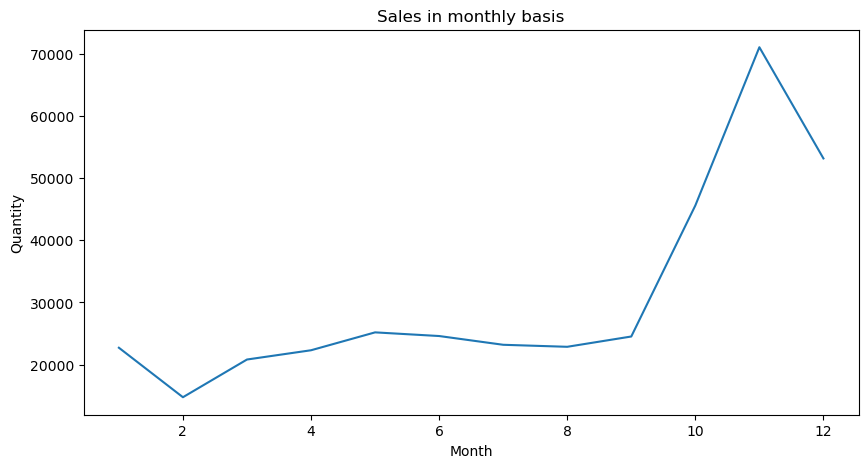

In [20]:
# now visulize it in plot
plt.figure(figsize=(10,5))
monthly.plot()
plt.title('Sales in monthly basis')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()

In [21]:
# now calculate and analyse profit by category
category_sales=df.groupby('Category')['Profit'].sum()

In [22]:
category_sales

Category
Accessories            3438046.28
Clothing & Apparel     8826851.49
Electronics            8065113.92
Home & Furniture      11218596.44
Name: Profit, dtype: float64

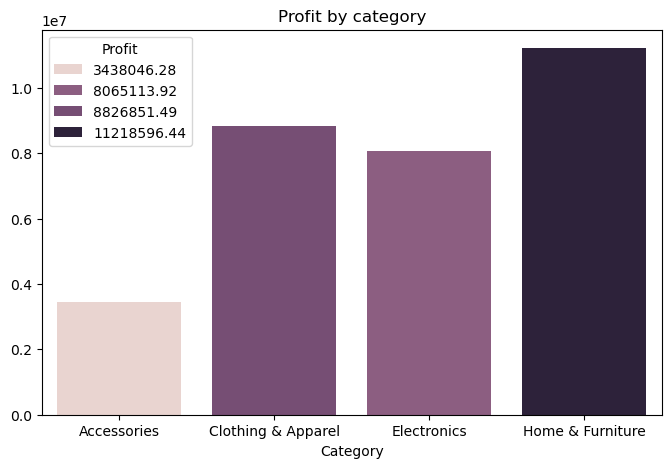

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index,y=category_sales.values,hue=category_sales)
plt.title('Profit by category')
plt.show()

In [24]:
# now calculate profit on perticular product
top_products = df.groupby('Product_Name')['Profit'].sum()

In [25]:
top_products

Product_Name
Adidas Tracksuit          766612.16
Apple Watch               957992.87
Apple iPhone 14           808671.16
Ashley Recliner           469158.18
Backpack                  482029.14
Belt                      260711.04
Bose Soundbar             321231.11
Brooklinen Sheets         933904.24
Carter's Onesie           907369.41
Charging Cable            385761.32
Children's Hoodie         700414.08
Closet Organizer          771464.27
Cookware Set              461471.10
Crocs                     570562.06
Dell XPS 13               438733.96
Dining Table Set          388640.92
Dyson Vacuum              262741.41
Fitbit Charge             335264.03
GAP Hoodie                492979.33
Google Pixel 7            184425.54
IKEA Sofa                 824017.25
Instant Pot              1689924.16
KitchenAid Mixer          944239.08
LG OLED TV                373555.37
Lenovo ThinkPad           258881.28
Levi's Jeans              720231.96
MacBook Air              1028767.59
Nike Air Force 

In [26]:
# getting top 10 products
# sort by decending order
top_products = df.groupby('Product_Name')['Profit'].sum().sort_values(ascending=False).head(10)

In [27]:
top_products

Product_Name
Tempur-Pedic Mattress    2134208.80
Instant Pot              1689924.16
Nike Air Force 1         1128698.91
Storage Rack             1052179.55
MacBook Air              1028767.59
Old Navy Dress            960337.85
Apple Watch               957992.87
KitchenAid Mixer          944239.08
Brooklinen Sheets         933904.24
Carter's Onesie           907369.41
Name: Profit, dtype: float64

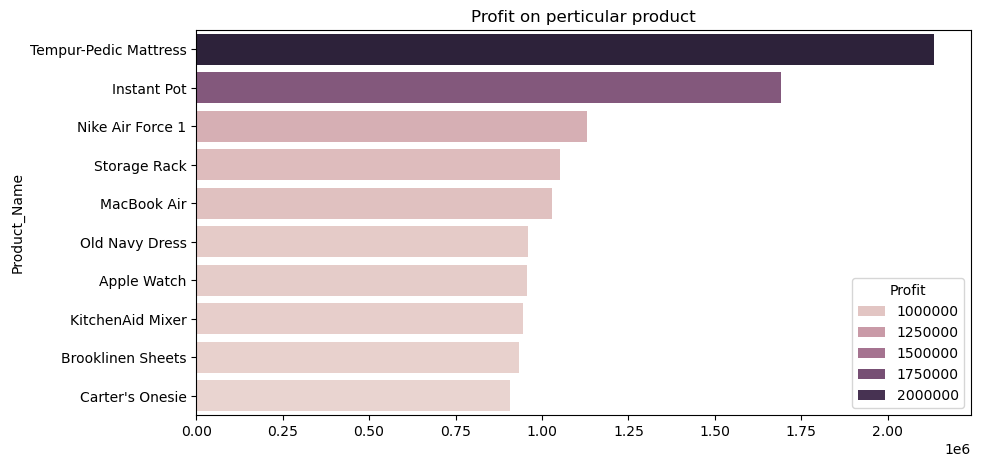

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values,y=top_products.index,hue=top_products)
plt.title('Profit on perticular product')
plt.show()

In [29]:
# now we calculate te Region wise Revenue
region_revenue=df.groupby('Region')['Revenue'].sum()

In [30]:
region_revenue

Region
Centre    36081894.34
East      44980048.22
South     25102960.64
West      36242841.73
Name: Revenue, dtype: float64

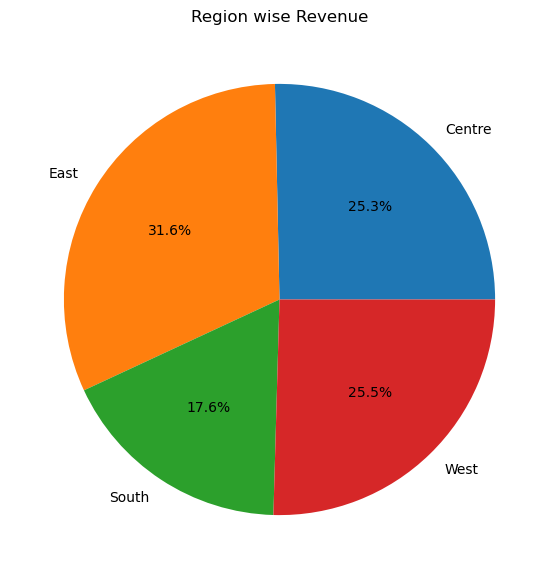

In [31]:
plt.figure(figsize=(7,7))
plt.pie(region_revenue,labels=region_revenue.index,autopct='%0.1f%%')
plt.title('Region wise Revenue')
plt.show()

# **East region is the top-performing revenue region**

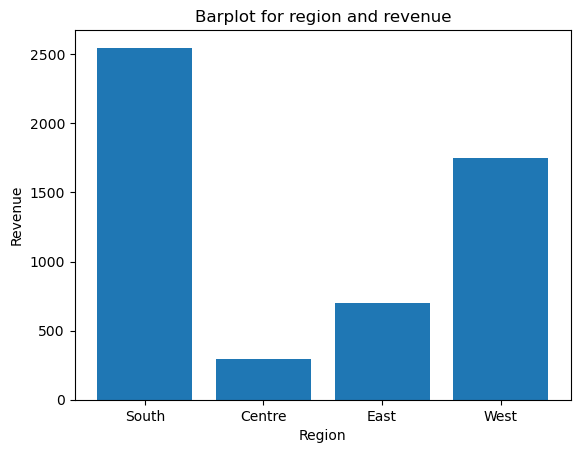

In [32]:
plt.bar(df['Region'].head(10),df['Revenue'].head(10))
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.title('Barplot for region and revenue')
plt.show()

In [33]:
# region summary
region_summary = df.groupby('Region')[['Revenue','Profit']].sum()

In [34]:
region_summary

,Revenue,Profit
Region,,
Centre,36081894.34,8094863.77
East,44980048.22,9221327.43
South,25102960.64,5918454.17
West,36242841.73,8313962.76


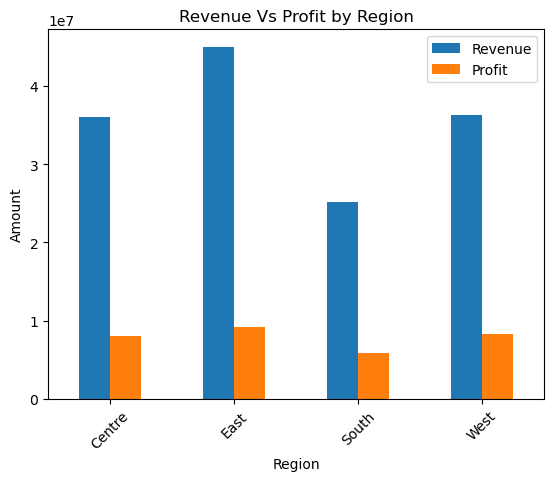

In [35]:
# now visualize throug plot
region_summary.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.title('Revenue Vs Profit by Region')
plt.xticks(rotation=45)
plt.show()

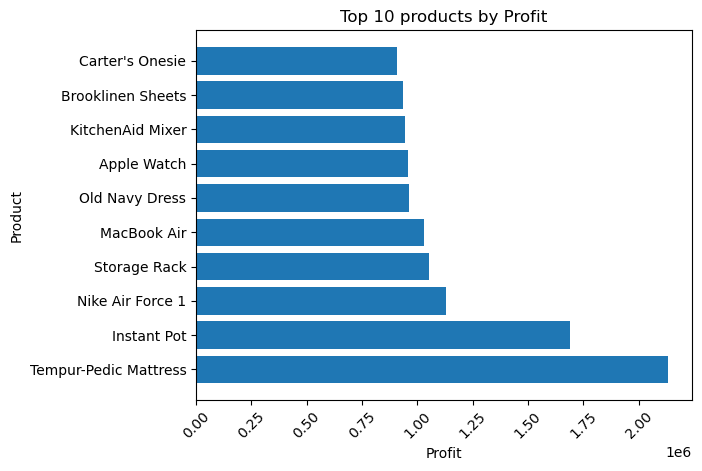

In [36]:
# getting top 10 products
top_products = df.groupby('Product_Name')['Profit'].sum().sort_values(ascending=False).head(10)
plt.barh(top_products.index,top_products.values)
plt.xlabel('Profit')
plt.ylabel('Product')
plt.title('Top 10 products by Profit')
plt.xticks(rotation=45)
plt.show()

In [37]:
# now checking statewise profit
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)

In [38]:
state_profit

State
California       1559163.05
Arizona          1522534.06
Illinois          964010.55
Ohio              962665.01
Connecticut       936104.96
New York          933792.77
New Jersey        933763.96
Pennsylvania      924369.53
New Hampshire     920722.06
Maryland          918115.24
Name: Profit, dtype: float64

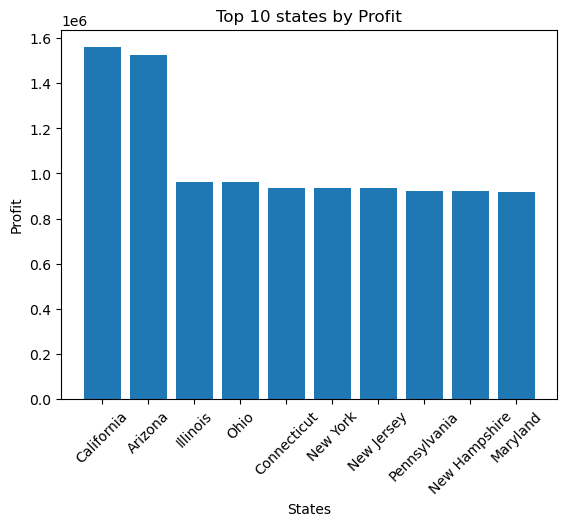

In [39]:
plt.bar(state_profit.index,state_profit.values)
plt.xlabel('States')
plt.ylabel('Profit')
plt.title('Top 10 states by Profit')
plt.xticks(rotation=45)
plt.show()

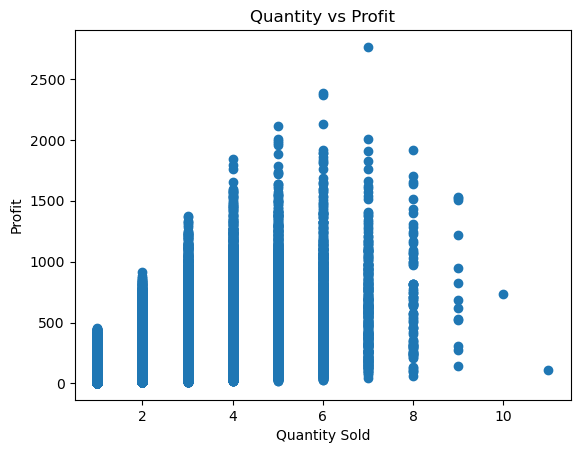

In [40]:
# now we see Quantity vs profit check
plt.scatter(df['Quantity'],df['Profit'])
plt.xlabel('Quantity Sold')
plt.ylabel('Profit')
plt.title('Quantity vs Profit')
plt.show()